# my test code

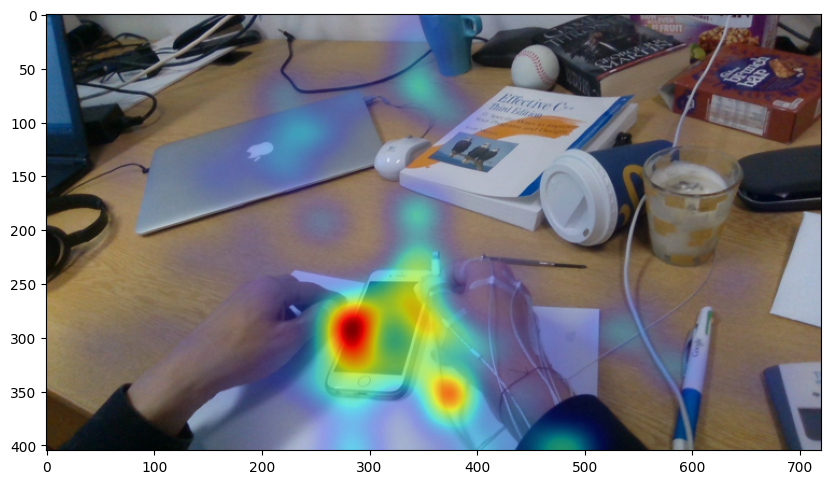

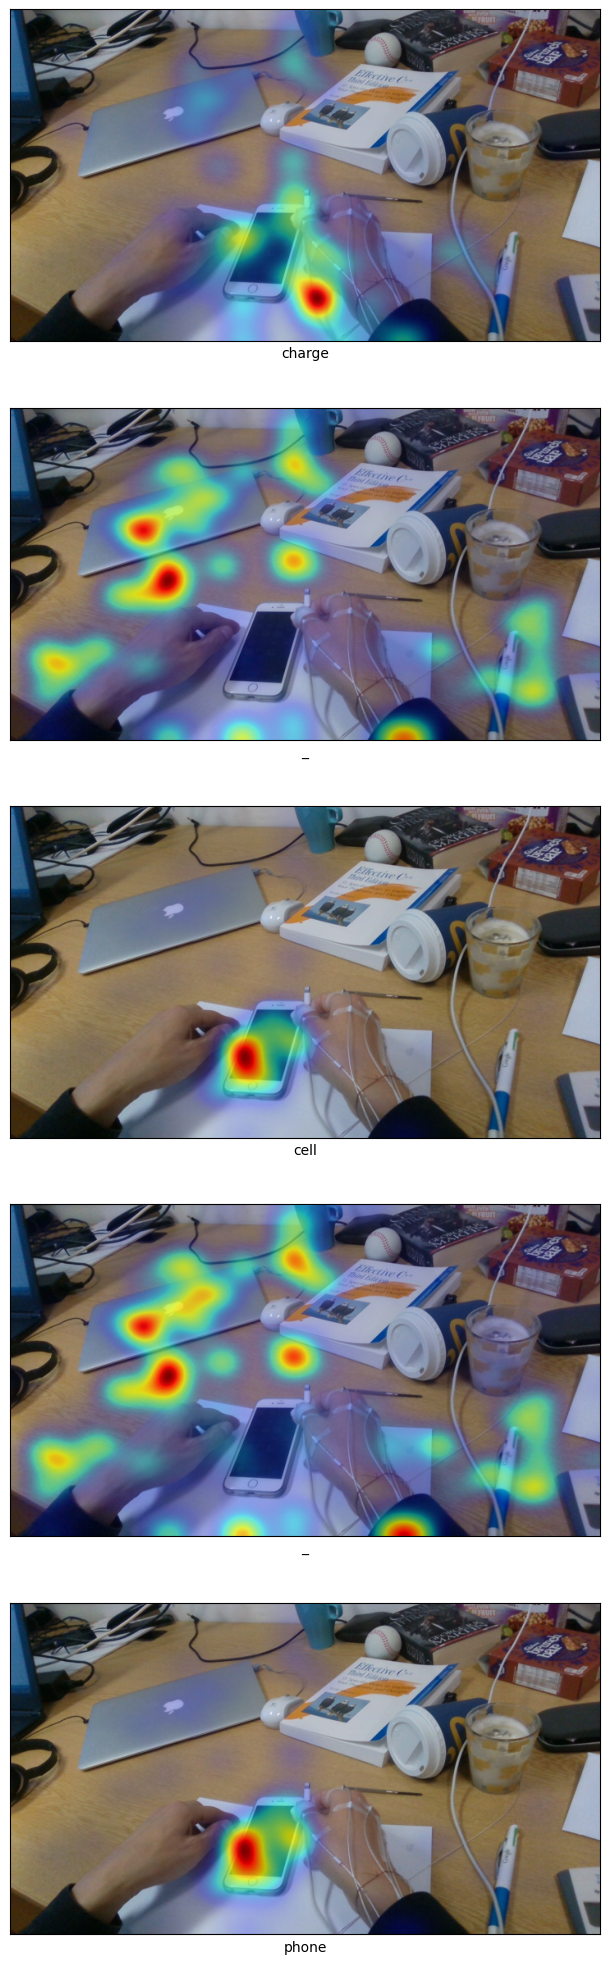

In [5]:
#+begin_src python
import torch
from PIL import Image
from lavis.models import load_model_and_preprocess
from lavis.processors import load_processor
from matplotlib import pyplot as plt
from lavis.common.gradcam import getAttMap
from lavis.models.blip_models.blip_image_text_matching import compute_gradcam
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_path = "/z/dat/F-PHAB/F-PHAB_media_v000/Video_files/Subject_1/charge_cell_phone/1/color/0000000001/full_scale.jpg"
# "/z/dat/EpicKitchens50/EpicKitchens50_media_v000/videos/train/P01/P01_01/0000004950/full_scale.jpg"
raw_image = Image.open(img_path).convert("RGB")
try:
    model;
except:
    model, vis_processors, text_processors = load_model_and_preprocess("blip_image_text_matching", "large", device=device, is_eval=True)
dst_w = 720
w, h = raw_image.size
scaling_factor = dst_w / w
resized_img = raw_image.resize((int(w * scaling_factor), int(h * scaling_factor)))
norm_img = np.float32(resized_img) / 255
img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

caption = "charge_cell_phone"
txt = text_processors["eval"](caption)
txt_tokens = model.tokenizer(txt, return_tensors="pt").to(device)
gradcam, _ = compute_gradcam(model, img, txt, txt_tokens, block_num=7)
avg_gradcam = getAttMap(norm_img, gradcam[0][1].numpy(), blur=True)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(avg_gradcam)
ax.set_title(caption)
# fig.savefig(f"/z/home/yayuanli/web/tmp/gradcam_{caption.replace(' ','')}.png")
plt.show()

num_image = len(txt_tokens.input_ids[0]) - 2
fig, ax = plt.subplots(num_image, 1, figsize=(15, 5 * num_image))

gradcam_iter = iter(gradcam[0][2:-1])
token_id_iter = iter(txt_tokens.input_ids[0][1:-1])

for i, (gradcam, token_id) in enumerate(zip(gradcam_iter, token_id_iter)):
    word = model.tokenizer.decode([token_id])
    gradcam_image = getAttMap(norm_img, gradcam.numpy(), blur=True)
    ax[i].imshow(gradcam_image)
    ax[i].set_yticks([])
    ax[i].set_xticks([])
    ax[i].set_xlabel(word)
    # fig.savefig(f"/z/home/yayuanli/web/tmp/gradcam_{caption.replace(' ', '')}_tokens_.png")
plt.show()



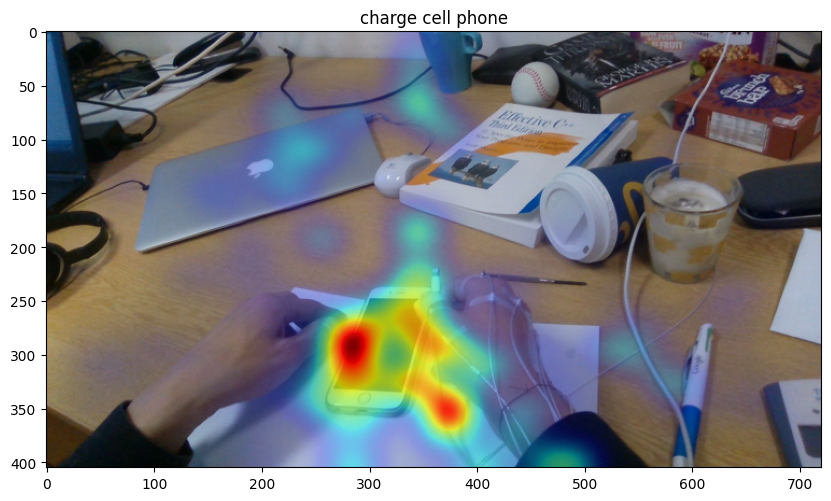

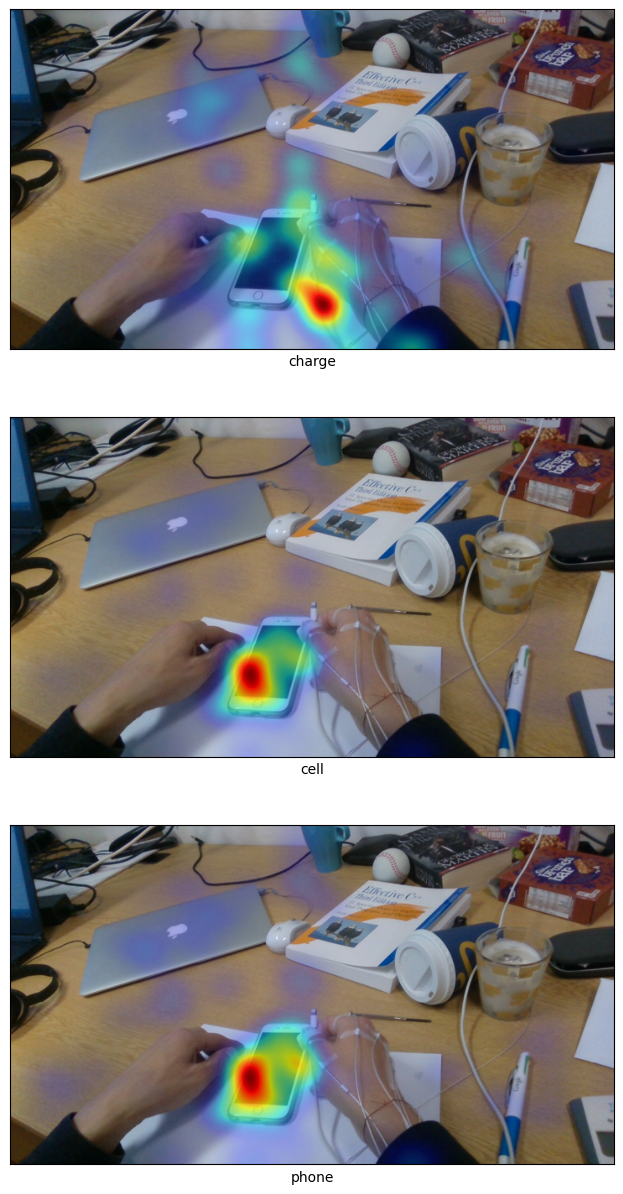

In [7]:
#+begin_src python
import torch
from PIL import Image
from lavis.models import load_model_and_preprocess
from lavis.processors import load_processor
from matplotlib import pyplot as plt
from lavis.common.gradcam import getAttMap
from lavis.models.blip_models.blip_image_text_matching import compute_gradcam
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_path = "/z/dat/F-PHAB/F-PHAB_media_v000/Video_files/Subject_1/charge_cell_phone/1/color/0000000001/full_scale.jpg"
# "/z/dat/EpicKitchens50/EpicKitchens50_media_v000/videos/train/P01/P01_01/0000004950/full_scale.jpg"
raw_image = Image.open(img_path).convert("RGB")
try:
    model;
except:
    model, vis_processors, text_processors = load_model_and_preprocess("blip_image_text_matching", "large", device=device, is_eval=True)
dst_w = 720
w, h = raw_image.size
scaling_factor = dst_w / w
resized_img = raw_image.resize((int(w * scaling_factor), int(h * scaling_factor)))
norm_img = np.float32(resized_img) / 255
img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

caption = "charge cell phone"
txt = text_processors["eval"](caption)
txt_tokens = model.tokenizer(txt, return_tensors="pt").to(device)
gradcam, _ = compute_gradcam(model, img, txt, txt_tokens, block_num=7)
avg_gradcam = getAttMap(norm_img, gradcam[0][1].numpy(), blur=True)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(avg_gradcam)
# fig.savefig(f"/z/home/yayuanli/web/tmp/gradcam_{caption.replace(' ','')}.png")
ax.set_title(caption)
plt.show()

num_image = len(txt_tokens.input_ids[0]) - 2
fig, ax = plt.subplots(num_image, 1, figsize=(15, 5 * num_image))

gradcam_iter = iter(gradcam[0][2:-1])
token_id_iter = iter(txt_tokens.input_ids[0][1:-1])

for i, (gradcam, token_id) in enumerate(zip(gradcam_iter, token_id_iter)):
    word = model.tokenizer.decode([token_id])
    gradcam_image = getAttMap(norm_img, gradcam.numpy(), blur=True)
    ax[i].imshow(gradcam_image)
    ax[i].set_yticks([])
    ax[i].set_xticks([])
    ax[i].set_xlabel(word)
    # fig.savefig(f"/z/home/yayuanli/web/tmp/gradcam_{caption.replace(' ', '')}_tokens_.png")
plt.show()



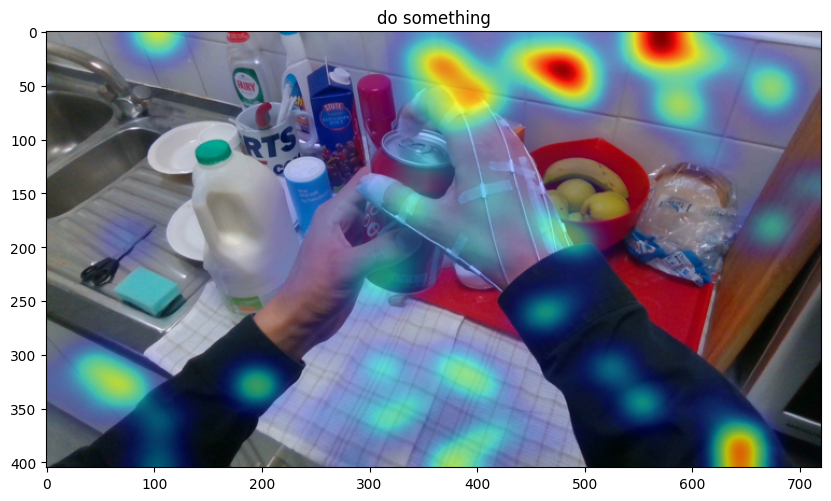

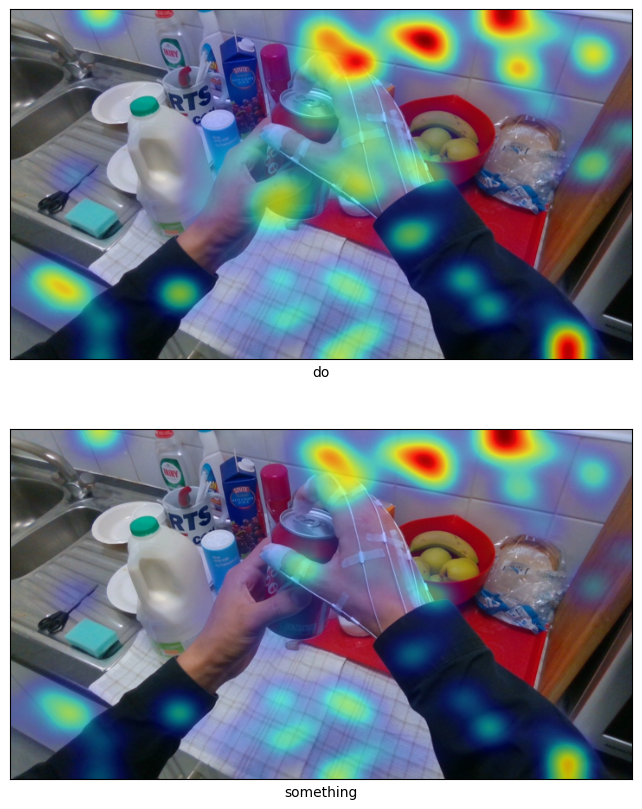

In [3]:
#+begin_src python
import torch
from PIL import Image
from lavis.models import load_model_and_preprocess
from lavis.processors import load_processor
from matplotlib import pyplot as plt
from lavis.common.gradcam import getAttMap
from lavis.models.blip_models.blip_image_text_matching import compute_gradcam
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_path = "/z/dat/F-PHAB/F-PHAB_media_v000/Video_files/Subject_1/open_soda_can/1/color/0000000001/full_scale.jpg"
# "/z/dat/EpicKitchens50/EpicKitchens50_media_v000/videos/train/P01/P01_01/0000004950/full_scale.jpg"
raw_image = Image.open(img_path).convert("RGB")
try:
    model;
except:
    model, vis_processors, text_processors = load_model_and_preprocess("blip_image_text_matching", "large", device=device, is_eval=True)
dst_w = 720
w, h = raw_image.size
scaling_factor = dst_w / w
resized_img = raw_image.resize((int(w * scaling_factor), int(h * scaling_factor)))
norm_img = np.float32(resized_img) / 255
img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

caption = "do something"
txt = text_processors["eval"](caption)
txt_tokens = model.tokenizer(txt, return_tensors="pt").to(device)
gradcam, _ = compute_gradcam(model, img, txt, txt_tokens, block_num=7)
avg_gradcam = getAttMap(norm_img, gradcam[0][1].numpy(), blur=True)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(avg_gradcam)
# fig.savefig(f"/z/home/yayuanli/web/tmp/gradcam_{caption.replace(' ','')}.png")
ax.set_title(caption)
plt.show()

num_image = len(txt_tokens.input_ids[0]) - 2
fig, ax = plt.subplots(num_image, 1, figsize=(15, 5 * num_image))

gradcam_iter = iter(gradcam[0][2:-1])
token_id_iter = iter(txt_tokens.input_ids[0][1:-1])

for i, (gradcam, token_id) in enumerate(zip(gradcam_iter, token_id_iter)):
    word = model.tokenizer.decode([token_id])
    gradcam_image = getAttMap(norm_img, gradcam.numpy(), blur=True)
    ax[i].imshow(gradcam_image)
    ax[i].set_yticks([])
    ax[i].set_xticks([])
    ax[i].set_xlabel(word)
    # fig.savefig(f"/z/home/yayuanli/web/tmp/gradcam_{caption.replace(' ', '')}_tokens_.png")
plt.show()



# OG example code

In [1]:
import torch
from PIL import Image

from lavis.models import load_model_and_preprocess
from lavis.processors import load_processor

#### Load an example image and text

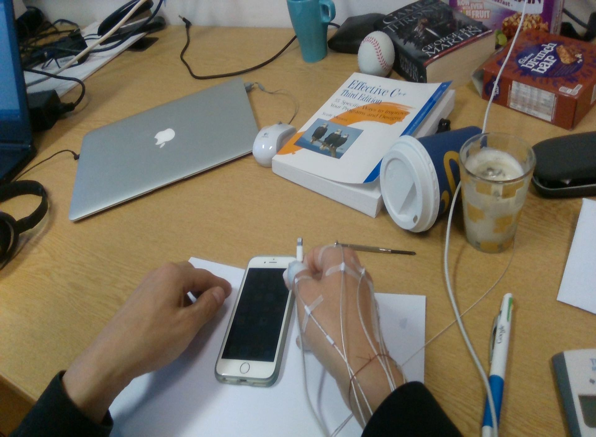

In [2]:
img_path = "/z/dat/F-PHAB/F-PHAB_media_v000/Video_files/Subject_1/charge_cell_phone/1/color/0000000001/full_scale.jpg"
raw_image = Image.open(img_path).convert("RGB")
display(raw_image.resize((596, 437)))

In [3]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# caption = "Merlion near marina bay."
caption = "someone is doing something"

#### Load model and preprocessors

In [5]:
# model, vis_processors, text_processors = load_model_and_preprocess("blip_image_text_matching", "base", device=device, is_eval=True)
model, vis_processors, text_processors = load_model_and_preprocess("blip_image_text_matching", "large", device=device, is_eval=True)

100%|██████████| 3.43G/3.43G [01:41<00:00, 36.2MB/s]


#### Plot utilities for GradCam

In [6]:
from matplotlib import pyplot as plt
from lavis.common.gradcam import getAttMap
from lavis.models.blip_models.blip_image_text_matching import compute_gradcam
import numpy as np

dst_w = 720
w, h = raw_image.size
scaling_factor = dst_w / w

resized_img = raw_image.resize((int(w * scaling_factor), int(h * scaling_factor)))
norm_img = np.float32(resized_img) / 255

#### Preprocess image and text inputs

In [7]:
img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
txt = text_processors["eval"](caption)

#### Compute GradCam

In [8]:
txt_tokens = model.tokenizer(txt, return_tensors="pt").to(device)
gradcam, _ = compute_gradcam(model, img, txt, txt_tokens, block_num=7)

#### Average GradCam for the full image

In [14]:
avg_gradcam = getAttMap(torch.from_numpy(norm_img), gradcam[0][1], blur=True)

TypeError: Cannot interpret 'torch.float32' as a data type

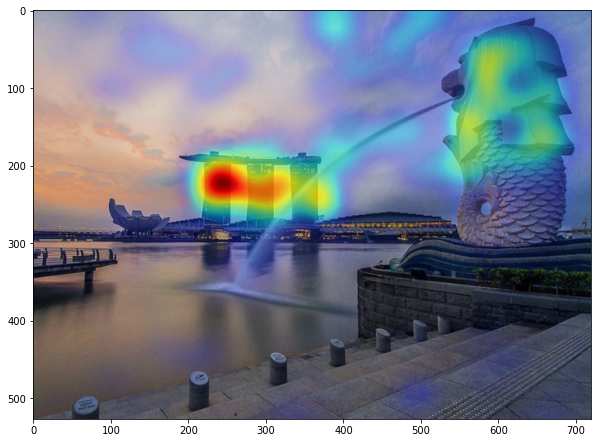

In [10]:
# fig, ax = plt.subplots(num_image, 1, figsize=(15,5*num_image))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(avg_gradcam)


#### GradCam for each token

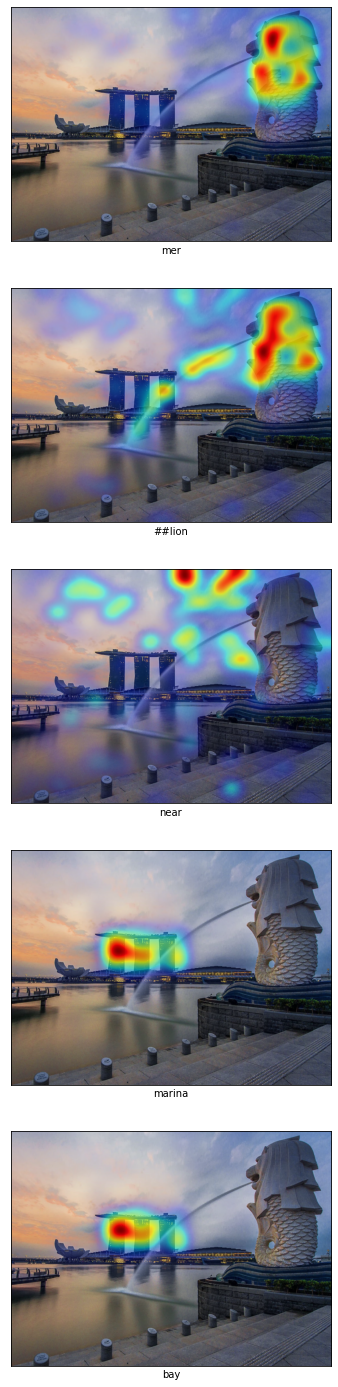

In [11]:
num_image = len(txt_tokens.input_ids[0]) - 2
fig, ax = plt.subplots(num_image, 1, figsize=(15, 5 * num_image))

gradcam_iter = iter(gradcam[0][2:-1])
token_id_iter = iter(txt_tokens.input_ids[0][1:-1])

for i, (gradcam, token_id) in enumerate(zip(gradcam_iter, token_id_iter)):
    word = model.tokenizer.decode([token_id])
    gradcam_image = getAttMap(norm_img, gradcam, blur=True)
    ax[i].imshow(gradcam_image)
    ax[i].set_yticks([])
    ax[i].set_xticks([])
    ax[i].set_xlabel(word)
    